In [1]:
%matplotlib inline
from imgseries import ImgSeries, ImgStack, ImgSequence
import matplotlib.pyplot as plt
from pathlib import Path

# Define ImgSeries object

In [2]:
basefolder = Path('../data')
folders = [basefolder / folder for folder in ('img1', 'img2')]
images = ImgSeries(folders, savepath=basefolder / 'untracked_data')

**NOTE**: see further below for the case where the images are within a TIFF stack

# Access image dimensions

In [3]:
images.nx, images.ny  # dimensions in x and y

(608, 550)

In [4]:
images.ndim   # 2 for black and white, 3 for color (note: changes if grayscale transform is applied/removed)

2

In [5]:
images.ntot  # Total number of images in the series

50

# Access, read and show individual images

In [6]:
images.files[33]

filo.File #33 [img-00643.png in folder '../data/img2']

In [7]:
images.files[33].path

PosixPath('../data/img2/img-00643.png')

In [8]:
ii = images.read(33)  # read image num 33 as an array

(<Axes: title={'center': 'img-00610.png (#0)'}>,)

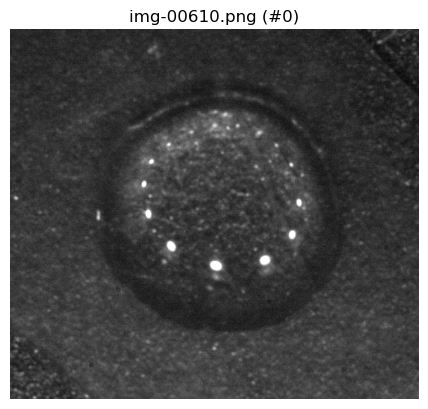

In [9]:
images.show()  # show first image in the series (auto grayscale)

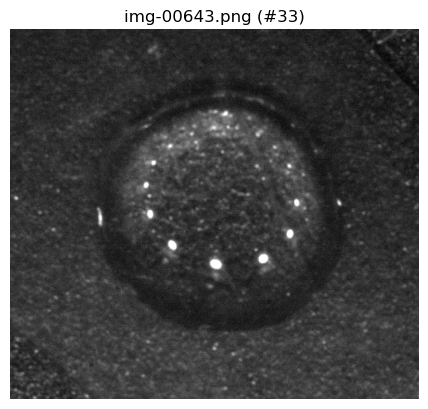

In [10]:
ax = images.show(33)  # show specific image in the series

`images.show()` accepts any keyword-argument that `matplotlib.pyplot.imshow()` accepts:

(<Axes: title={'center': 'img-00643.png (#33)'}>,)

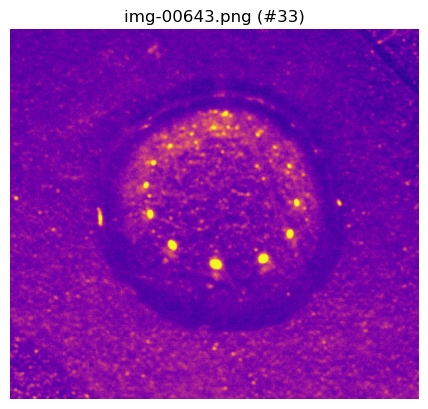

In [11]:
images.show(num=33, cmap='plasma', vmax=220)

It is however possible to define the display limits and colormaps permanently for the image series, see following section

# Looping on images

Looping is possible using the `.nums` attribute, which is a sliceable iterable that iterates over the image identifiers

In [12]:
for num in images.nums:
    img = images.read(num)

As a result it is possible to work with subset of images:

In [13]:
for num in images.nums[10:30:2]:
    img = images.read(num)
    print('num =', num, '- image min:', img.min())

num = 10 - image min: 25
num = 12 - image min: 29
num = 14 - image min: 27
num = 16 - image min: 29
num = 18 - image min: 29
num = 20 - image min: 27
num = 22 - image min: 27
num = 24 - image min: 27
num = 26 - image min: 27
num = 28 - image min: 27


# Define `Display Parameters`: contrast / colormap

These parameters are only applied when showing the images (in matplotlib `imshow()`), but DO NOT impact analysis. In particular, changing the contrast does not changes the pixel value in the images. This is important e.g. for further analysis based on grayscale values : the grayscales to consider are the initial pixel values.

**NOTE**: see Interactive version of this notebook to define contrast interactively

## Contrast

In [14]:
images.display.vmin = 60
images.display.vmax = 140

(<Axes: title={'center': 'img-00610.png (#0)'}>,)

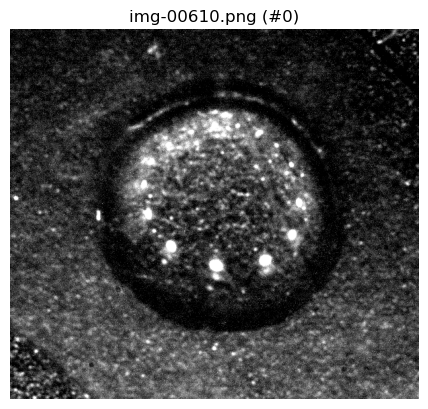

In [15]:
# alternatively:
images.display.vlims = (60, 140)
images.show()

(<Axes: title={'center': 'img-00610.png (#0)'}>,)

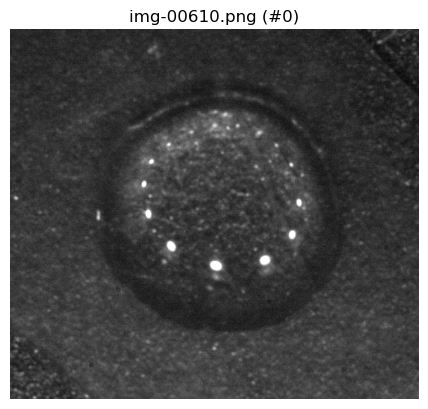

In [16]:
images.display.reset()  # go back to auto grayscale
images.show()

## Colormap

(<Axes: title={'center': 'img-00610.png (#0)'}>,)

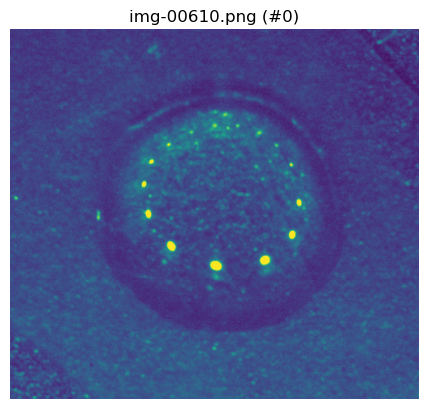

In [17]:
images.display.cmap = 'viridis'  # any matplotlib accepted colormap name
images.show()

(<Axes: title={'center': 'img-00610.png (#0)'}>,)

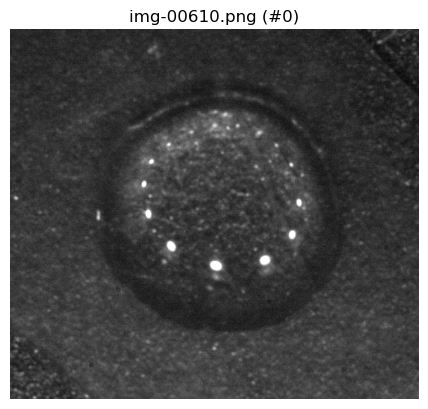

In [18]:
images.display.reset()
images.show()

## Save / load display parameters

In [19]:
images.display.vlims = (50, 150)
images.display.cmap = 'gray'
images.save_display()

In [20]:
images.load_display()
print(images.display.vmin, images.display.vmax, images.display.cmap)

50 150 gray


# Define `Transform Parameters`: rotation, crop, filter, subtraction

These parameters are applied on all images upon reading with `read()` and are taken into account when running analysis methods. Rotation is applied BEFORE crop.

**NOTE**: see Interactive version of this notebook to define rotation angle and crop interactively

## Rotation

<Axes: title={'center': 'Rotation: -66.6° (img #0)'}>

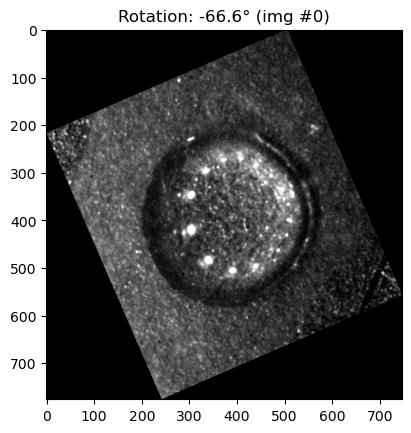

In [21]:
images.rotation.angle = -66.6  # equivalently, images.rotation.data['angle'] = -66.6, but this is not recommended because it can interfere with caching when used.
images.rotation.show()

## Crop

**NOTE**: Needs to be done **AFTER** defining the rotation (if rotation needs to be defined), because the cropping applies to the coordinates in the rotated image.

<Axes: title={'center': 'Crop Zone (img #0)'}>

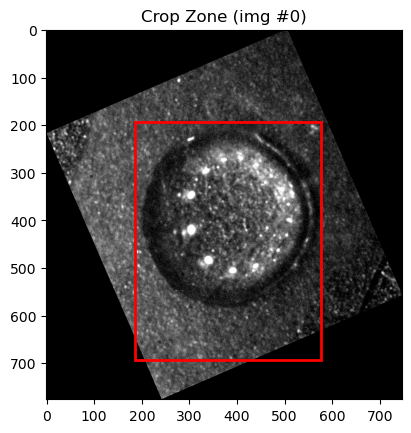

In [22]:
images.crop.zone = (186, 193, 391, 500)
images.crop.show()

(<Axes: title={'center': 'img-00610.png (#0)'}>,)

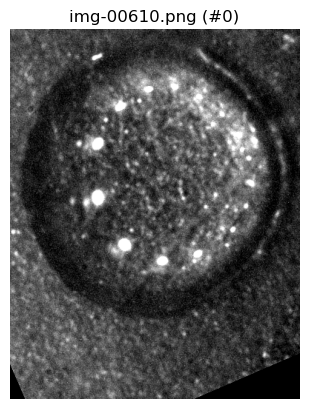

In [23]:
images.show()

## Filter

In [24]:
images.filter.size = 3
images.filter

Filter {'size': 3}

(<Axes: title={'center': 'img-00640.png (#30)'}>,)

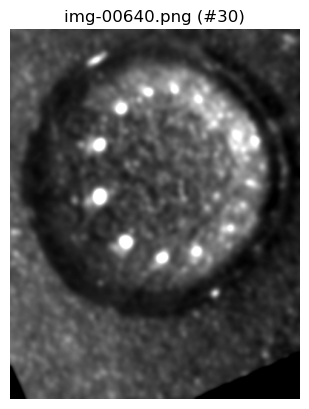

In [25]:
images.show(30)

## Subtraction

/Users/olivier.vincent/Python-OV/imgseries/imgseries/parameters/transform.py:416: RuntimeWarning: divide by zero encountered in divide
  return img / self.reference_image - 1
/Users/olivier.vincent/Python-OV/imgseries/imgseries/parameters/transform.py:416: RuntimeWarning: invalid value encountered in divide
  return img / self.reference_image - 1


(<Axes: title={'center': 'img-00640.png (#30)'}>,)

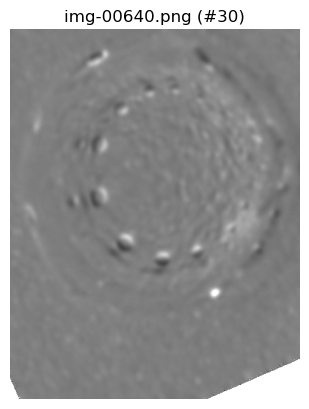

In [26]:
images.subtraction.reference = range(10)
images.subtraction.relative = True
images.display.vlims = -0.6, 0.6
images.show(num=30)

## Threshold

In [27]:
images.threshold.vmin = -0.02
images.threshold.vmax = 0.04

/Users/olivier.vincent/Python-OV/imgseries/imgseries/parameters/transform.py:416: RuntimeWarning: divide by zero encountered in divide
  return img / self.reference_image - 1
/Users/olivier.vincent/Python-OV/imgseries/imgseries/parameters/transform.py:416: RuntimeWarning: invalid value encountered in divide
  return img / self.reference_image - 1


(<Axes: title={'center': 'img-00640.png (#30)'}>,)

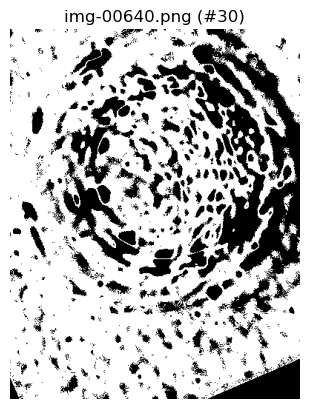

In [28]:
images.show(num=30)

## Grayscale (for color images)

(<Axes: title={'center': 'color0050.jpg (#50)'}>,)

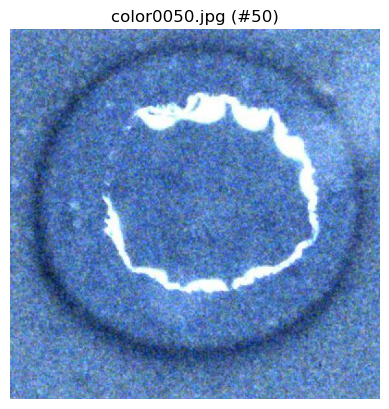

In [29]:
color_images = ImgSeries('../data/color', extension='.jpg')
color_images.show(num=50)

(<Axes: title={'center': 'color0050.jpg (#50)'}>,)

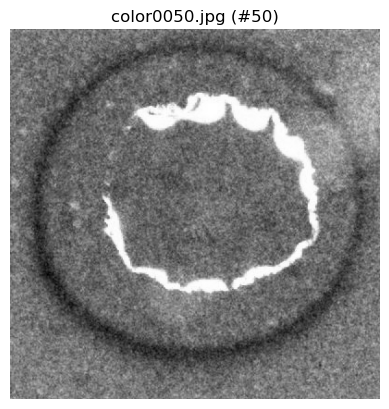

In [30]:
color_images.grayscale.active = True
color_images.show(num=50)

## Reset transforms

<Axes: title={'center': 'No crop zone defined'}>

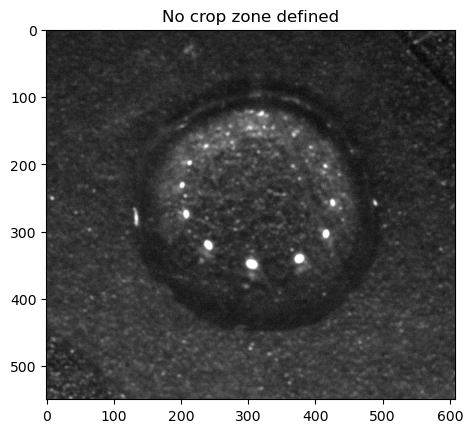

In [31]:
images.rotation.reset()  # similar to setting the angle manually to zero, but rotation.data also gets empty
images.crop.reset()      # similar to setting the cropbox to the total image size, but crop.data also gets emtpy
images.filter.reset()
images.subtraction.reset()
images.threshold.reset()
images.display.reset()
images.crop.show(num=33)

## Save and load transform parameters

In [32]:
images.rotation.angle = -70
images.crop.zone = (150, 150, 500, 590)
images.save_transforms('Img_Transform_ImgSeriesNotebook')  # there are options to specify a custom filename, see help

In [33]:
images.load_transforms('../for-tests-do-not-modify/Img_Transform_ImgSeriesNotebook')  # here with custom filename possible
images.crop

Crop {'zone': [150, 150, 500, 590]}

(<Axes: title={'center': 'img-00643.png (#33)'}>,)

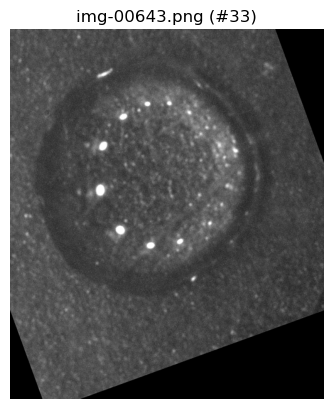

In [34]:
images.show(num=33)

In order to load and/or show the image without crop/rotation:

In [35]:
images.read(num=11, transform=False)

array([[ 67,  65,  75, ...,  72,  70,  61],
       [ 64,  51,  52, ...,  63,  61,  74],
       [ 66,  55,  59, ...,  56,  65,  65],
       ...,
       [ 77,  82,  72, ...,  94,  92, 107],
       [ 77,  90,  81, ...,  96,  95, 102],
       [ 92,  85,  85, ...,  88,  94, 104]], dtype=uint8)

(<Axes: title={'center': 'img-00621.png (#11) [RAW]'}>,)

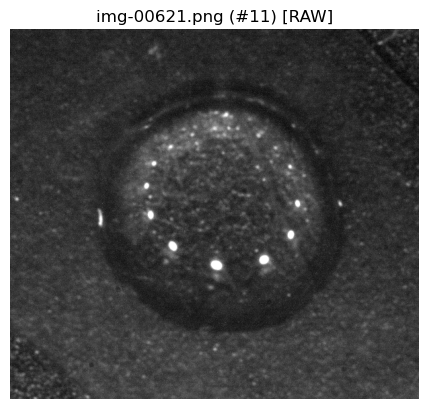

In [36]:
images.show(num=11, transform=False)

It is also possible to read an image by omitting one or more specific transform (not possible with show() however, because kwargs are dedicated to specific arguments for imshow():

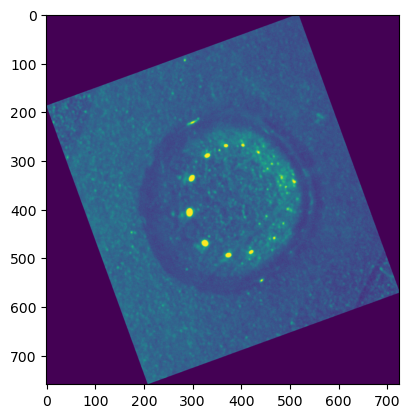

In [37]:
img = images.read(num=30, crop=False, filter=False)
plt.imshow(img)

# Image timestamps

## Get and save time of images

In [38]:
images.info.head()  # extracted automatically from the file info (modification time)

,folder,filename,time (unix)
num,,,
0,../img1,img-00610.png,1.696408e+09
1,../img1,img-00611.png,1.696408e+09
2,../img1,img-00612.png,1.696408e+09
3,../img1,img-00613.png,1.696408e+09
4,../img1,img-00614.png,1.696408e+09


In [39]:
images.save_info()  # save file and timing info from images.info into csv file

## Load time of image from external file

In [40]:
images.load_times('../for-tests-do-not-modify/Img_Files_Rounded.tsv')  # update only time data
images.info.head()

,folder,filename,time (unix)
num,,,
0,../img1,img-00610.png,1599832397
1,../img1,img-00611.png,1599832399
2,../img1,img-00612.png,1599832401
3,../img1,img-00613.png,1599832403
4,../img1,img-00614.png,1599832405


# Working with tiff stacks

In [41]:
images = ImgStack('../data/stack/ImgStack.tif', savepath='../data/stack')
images.data

array([[[46171, 46683, 47739, ..., 43722, 44538, 43962],
        [46987, 46747, 47963, ..., 43898, 45227, 45387],
        [46187, 45947, 45659, ..., 44666, 45963, 45963],
        ...,
        [46427, 47115, 44266, ..., 45867, 46475, 46907],
        [45034, 44154, 42762, ..., 47483, 46411, 46635],
        [43642, 41818, 40329, ..., 47979, 47995, 49404]],

       [[47787, 47387, 47211, ..., 43562, 44858, 43930],
        [47451, 47387, 47627, ..., 43370, 44570, 44490],
        [47675, 46683, 47979, ..., 44250, 44490, 45147],
        ...,
        [46123, 47435, 47243, ..., 48699, 49884, 50172],
        [46635, 46027, 46315, ..., 49724, 50348, 49756],
        [47323, 46379, 45403, ..., 49276, 49724, 51404]],

       [[47195, 47275, 46731, ..., 43402, 44362, 43434],
        [47339, 47435, 46443, ..., 44298, 44250, 45115],
        [47595, 47099, 47067, ..., 45339, 44394, 45034],
        ...,
        [45851, 45483, 45131, ..., 49099, 50444, 51372],
        [45595, 44890, 44410, ..., 49836, 502

In [42]:
images.read(10)

array([[47371, 46683, 46283, ..., 42458, 44074, 43754],
       [48091, 46379, 46443, ..., 42874, 43162, 45627],
       [47467, 46795, 47147, ..., 42090, 43562, 44394],
       ...,
       [39977, 40233, 39945, ..., 47403, 48091, 48763],
       [38505, 39545, 38729, ..., 47163, 48059, 47915],
       [38761, 38649, 40153, ..., 47147, 47787, 46811]], dtype=uint16)

(<Axes: title={'center': 'Image (#10)'}>,)

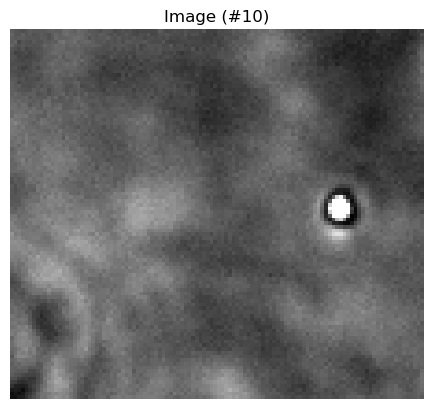

In [43]:
images.show(10)

Note: global rotation, crop, etc. work the same way as for image series from individual files:

<Axes: title={'center': 'Crop Zone (img #19)'}>

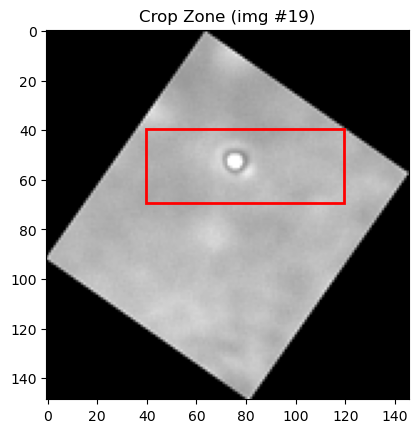

In [44]:
images.rotation.angle = 55
images.crop.zone = (40, 40, 80, 30)
images.crop.show(num=19)

In [45]:
for num in images.nums[::20]:
    print(images.read(num).max())

65535
65535
65535
65535
55449
65535
52950
55609
53556
54565


# Working with AVI videos

(<Axes: title={'center': 'Image (#4)'}>,)

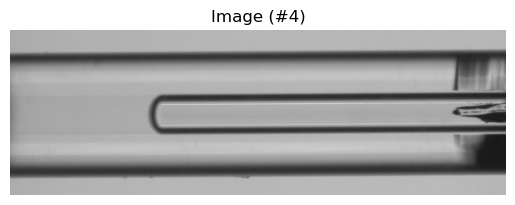

In [46]:
images = ImgStack('../data/video/video.avi')
images.show(4)

(then same as with TIFF stacks above)

# Working with array-like structures (e.g., `pims` image sequences)

In [47]:
import pims
imseq = pims.open('../data/video/video.avi')

In [48]:
images = ImgSequence(imseq)
images

ImgSequence, data length [12]
-- corrections: []
-- transforms: []
from <Frames>
Format: AVI (Audio Video Interleaved)
Source: ../data/video/video.avi
Duration: 2.400 seconds
Frame rate: 5.000 fps
Length: 12 frames
Frame Shape: (400, 1200, 3)

(<Axes: title={'center': 'Image (#4)'}>,)

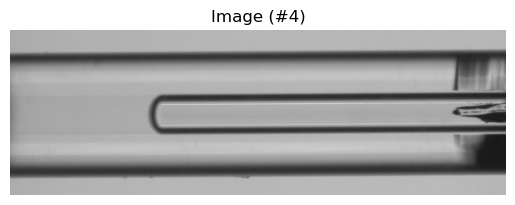

In [49]:
images.show(4)